In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

from sklearn.tree import DecisionTreeClassifier

train = pd.read_csv("Titanic_PreProdata.csv")

y = train.pop("Survived")
X = train

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

### min_samples_split

Text(0, 0.5, 'AUC Accuracy')

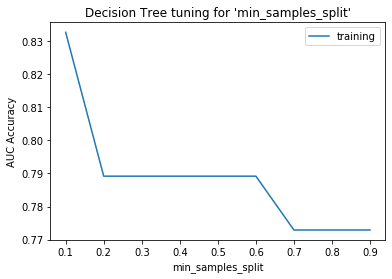

In [33]:
# min_samples_split represents the minimum number of samples required to split an internal node. 
# This can vary between considering at least one sample at each node to considering all of the samples at each node. 
# When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.
# Here we will vary the parameter from 10% to 100% of the samples

min_samples_splits = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

AUCaccuracy = []
for i in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=i)
    dt.fit(x_train, y_train)
    
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    AUCaccuracy.append(roc_auc)
    
plt.plot(min_samples_splits,AUCaccuracy,label = 'training')
plt.legend()
plt.title("Decision Tree tuning for 'min_samples_split'")
plt.xlabel("min_samples_split")
plt.ylabel("AUC Accuracy")

### Max_Depth

Text(0, 0.5, 'AUC Accuracy')

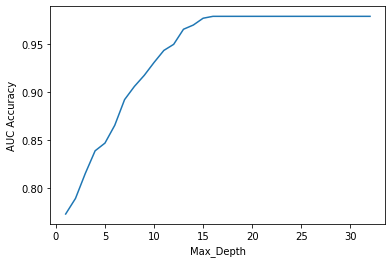

In [34]:
# max_depth : The first parameter to tune is max_depth. 
# This indicates how deep the tree can be. The deeper the tree,
# the more splits it has and it captures more information about the data. 
# We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

max_depths = np.linspace(1, 32, 32, endpoint=True)

AUCaccuracy = []
for i in max_depths:
    dt = DecisionTreeClassifier(max_depth= i)
    dt.fit(x_train, y_train)
    
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    AUCaccuracy.append(roc_auc)
    
plt.plot(max_depths,AUCaccuracy)
plt.xlabel("Max_Depth")
plt.ylabel("AUC Accuracy")